In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [18]:
homes_train = pd.read_csv('train.csv')

In [25]:
print(homes_train.shape)
homes_train.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [20]:
mask = homes_train.isna().any(axis = 0)
cols_with_missing = np.array(homes_train.columns)[mask]

homes_train[cols_with_missing].isna().sum(axis = 0) #which columns have missing values and how many missing values they have

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [21]:
# A simple example

homes_test = pd.read_csv('test.csv')

In [26]:
print(homes_test.shape)
homes_test.head()

(1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [27]:
sqft = homes_train[['1stFlrSF']].copy()
price = homes_train['SalePrice'].copy()

In [28]:
linear = LinearRegression()

In [37]:
linear.fit(sqft, np.log(price))

LinearRegression()

In [38]:
linear.score(sqft, np.log(price)) #fairly low correlation

0.3563863681303332

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

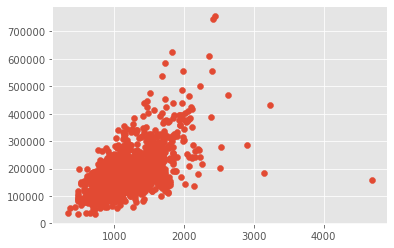

In [41]:
plt.scatter(x = sqft, y = price)

In [47]:
just_area = homes_train[['1stFlrSF', 'SalePrice']].copy()
SFmean = just_area['1stFlrSF'].mean()
SFsd = just_area['1stFlrSF'].std()
pricemean = just_area['SalePrice'].mean()
pricesd = just_area['SalePrice'].std()
print(SFmean, SFsd, pricemean, pricesd)

mask1 = np.abs(just_area['1stFlrSF'] - SFmean) / SFsd < 3 #remove outliers
mask2 = np.abs(just_area['SalePrice'] - pricemean) / pricesd < 3 #remove outliers
just_area_no_outliers = just_area.loc[mask1 & mask2]
just_area_no_outliers.shape

1162.626712328767 386.5877380410738 180921.19589041095 79442.50288288663


(1432, 2)

In [48]:
X = just_area_no_outliers[['1stFlrSF']]
Y = just_area_no_outliers['SalePrice']
linear.fit(X, np.log(Y))
linear.score(X, np.log(Y))

0.3430428446213011

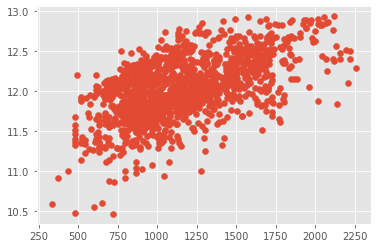

In [49]:
plt.scatter(x = X, y = np.log(Y))

In [55]:
more = homes[['1stFlrSF', 'FullBath', 'BedroomAbvGr', 'SalePrice']].copy()

In [57]:
X = more[['1stFlrSF', 'FullBath', 'BedroomAbvGr']]
Y = more['SalePrice']
linear.fit(X, np.log(Y))
linear.score(X, np.log(Y))

0.5143636731766428

In [62]:
ridge = Ridge(normalize = True, alpha = 1)
ridge.fit(X, np.log(Y))
ridge.score(X, np.log(Y))

0.4249214429173339

In [75]:
lasso = Lasso(normalize = True, alpha = .0001)
lasso.fit(X, np.log(Y))
lasso.score(X, np.log(Y))

0.5142249642243597

In [59]:
homes = pd.read_csv('train.csv')

In [77]:
homes.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

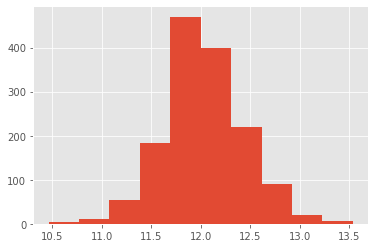

In [200]:
plt.hist(homes.SalePrice.apply(lambda x: np.log(x)))

In [86]:
homes.SalePrice.apply(lambda x: x**(1/6)).median()

7.39091034398429

In [96]:
X = 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [206]:
X = homes.copy().drop('SalePrice', axis = 1)
Y = homes.copy()['SalePrice']
X = pd.get_dummies(X, drop_first = True)
mask = X.isna().any(axis = 0)
X = X.loc[:, ~mask]

In [147]:
np.random.seed(0)
nrows = X.shape[0]
train = np.random.choice(range(nrows), round(nrows*0.8), replace = False)
X_train = X.loc[train]

In [148]:
sum(test)

801

In [150]:
test = pd.Series(range(nrows)).isin(train)
X_test = X.loc[~test]

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
11      12          60    11924            9            5       2005   
23      24         120     4224            5            7       1976   
24      25          20     8246            5            8       1968   
25      26          20    14230            8            5       2007   
28      29          20    16321            5            6       1957   
...    ...         ...      ...          ...          ...        ...   
1425  1426          20    10721            6            6       1959   
1435  1436          20     8400            6            9       1962   
1438  1439          20     7407            6            7       1957   
1446  1447          20    26142            5            7       1962   
1455  1456          60     7917            6            5       1999   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
11            2006         998           0        177  ...               0   
23            1976         840           0        200  ...               0   
24            2001         188         668        204  ...               0   
25            2007           0           0       1566  ...               0   
28            1997        1277           0        207  ...               0   
...            ...         ...         ...        ...  ...             ...   
1425          1959           0           0       1252  ...               0   
1435          2005           0           0       1319  ...               0   
1438          1996         600           0        312  ...               0   
1446          1962         593           0        595  ...               0   
1455          2000           0           0        953  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
11                 0             1             0            0   
23                 0             0             0            1   
24                 0             0             0            1   
25                 0             0             0            1   
28                 0             0             0            1   
...              ...           ...           ...          ...   
1425               0             0             0            1   
1435               0             0             0            0   
1438               0             0             0            1   
1446               0             0             0            1   
1455               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
11                        0                     0                     0   
23                        0                     0                     0   
24                        0                     0                     0   
25                        0                     0                     0   
28                        0                     0                     0   
...                     ...                   ...                   ...   
1425                      0                     0                     0   
1435                      0                     0                     0   
1438                      0                     0                     0   
1446                      0                     0                     0   
1455                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
11                       0                      1  
23                       1                      0  
24                       1                      0  
25                       1                      0  
28                       1                      0  
...                    ...                    ...  
1425                     1                      0  
1435                     0                      0  
1438                     1                      0  
1446

In [151]:
Y_train = Y[train]
Y_test = Y[~test]

In [173]:
ridge = Ridge()
RSSvalues = []
for alpha in np.arange(1e3)*0.05:
    ridge.set_params(alpha = alpha, normalize = True)
    ridge.fit(X_train, Y_train)
    predY = ridge.predict(X_test)
    RSS_ = ((predY - Y_test)**2).sum()
    RSSvalues.append(RSS_)

In [174]:
RSSvalues.index(min(RSSvalues))*.05
#use alpha = .25

0.25

In [182]:
ridge = Ridge()
ridge.set_params(alpha = 0.25, normalize = True)
ridge.fit(X_train, Y_train)
predY = ridge.predict(X_test)
pd.concat([X_test, pd.DataFrame(predY)], axis = 1)

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        NaN         NaN      NaN          NaN          NaN        NaN   
1        NaN         NaN      NaN          NaN          NaN        NaN   
2        NaN         NaN      NaN          NaN          NaN        NaN   
3        NaN         NaN      NaN          NaN          NaN        NaN   
4        NaN         NaN      NaN          NaN          NaN        NaN   
...      ...         ...      ...          ...          ...        ...   
1425  1426.0        20.0  10721.0          6.0          6.0     1959.0   
1435  1436.0        20.0   8400.0          6.0          9.0     1962.0   
1438  1439.0        20.0   7407.0          6.0          7.0     1957.0   
1446  1447.0        20.0  26142.0          5.0          7.0     1962.0   
1455  1456.0        60.0   7917.0          6.0          5.0     1999.0   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0              NaN         NaN         NaN        NaN  ...             NaN   
1              NaN         NaN         NaN        NaN  ...             NaN   
2              NaN         NaN         NaN        NaN  ...             NaN   
3              NaN         NaN         NaN        NaN  ...             NaN   
4              NaN         NaN         NaN        NaN  ...             NaN   
...            ...         ...         ...        ...  ...             ...   
1425        1959.0         0.0         0.0     1252.0  ...             0.0   
1435        2005.0         0.0         0.0     1319.0  ...             0.0   
1438        1996.0       600.0         0.0      312.0  ...             0.0   
1446        1962.0       593.0         0.0      595.0  ...             0.0   
1455        2000.0         0.0         0.0      953.0  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0              NaN           NaN          NaN                    NaN   
1              NaN           NaN          NaN                    NaN   
2              NaN           NaN          NaN                    NaN   
3              NaN           NaN          NaN                    NaN   
4              NaN           NaN          NaN                    NaN   
...            ...           ...          ...                    ...   
1425           0.0           0.0          1.0                    0.0   
1435           0.0           0.0          0.0                    0.0   
1438           0.0           0.0          1.0                    0.0   
1446           0.0           0.0          1.0                    0.0   
1455           0.0           0.0          1.0                    0.0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                      NaN                   NaN                   NaN   
1                      NaN                   NaN                   NaN   
2                      NaN                   NaN                   NaN   
3                      NaN                   NaN                   NaN   
4                      NaN                   NaN                   NaN   
...                    ...                   ...                   ...   
1425                   0.0                   0.0                   1.0   
1435                   0.0                   0.0                   0.0   
1438                   0.0                   0.0                   1.0   
1446                   0.0                   0.0                   1.0   
1455                   0.0                   0.0                   1.0   

      SaleCondition_Partial              0  
0                       NaN  381207.779559  
1                       NaN  148125.407758  
2                       NaN  163196.500056  
3                       NaN  256939.874318  
4                       NaN  203795.198704  
...                     ...            ...  
1425                    0.0            NaN  
1435                    0.0            NaN  
1438                    0

In [195]:
pred_train = ridge.predict(X_train)
((pred_train - np.array(Y_train))**2).mean()

670841521.9979719

In [198]:
pred_test = ridge.predict(X_test)
((pred_test - np.array(Y_test))**2).mean()

564231264.7821672

In [155]:
np.arange(1e2)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [199]:
pred_train - np.array(Y_train)

array([52909.16736256, 11403.45384808,  -722.80443312, ...,
       -2927.48426128, -1274.63482874, 22927.24855635])

In [201]:
from sklearn import tree

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [347]:
alphas = np.linspace(.0001, 1.0001, 2001)

In [348]:
lasso = Lasso()
lasso.set_params(normalize = True)
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(X, np.log(Y))
    coefs_lasso.append(lasso.coef_)
    
lasso_coef_df = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
lasso_coef_df

Id  MSSubClass       LotArea  OverallQual  OverallCond  YearBuilt  \
0.0001 -0.0   -0.000224  1.267665e-06     0.066807     0.033389   0.001366   
0.0006 -0.0   -0.000000  4.762139e-07     0.095016     0.010157   0.000994   
0.0011 -0.0   -0.000000  0.000000e+00     0.101092     0.000000   0.000781   
0.0016 -0.0   -0.000000  0.000000e+00     0.104434     0.000000   0.000767   
0.0021 -0.0   -0.000000  0.000000e+00     0.108564     0.000000   0.000554   
...     ...         ...           ...          ...          ...        ...   
0.9981 -0.0   -0.000000  0.000000e+00     0.000000    -0.000000   0.000000   
0.9986 -0.0   -0.000000  0.000000e+00     0.000000    -0.000000   0.000000   
0.9991 -0.0   -0.000000  0.000000e+00     0.000000    -0.000000   0.000000   
0.9996 -0.0   -0.000000  0.000000e+00     0.000000    -0.000000   0.000000   
1.0001 -0.0   -0.000000  0.000000e+00     0.000000    -0.000000   0.000000   

        YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0.0001      0.000813    0.000005         0.0       -0.0  ...            -0.0   
0.0006      0.001471    0.000018         0.0       -0.0  ...            -0.0   
0.0011      0.001355    0.000018         0.0       -0.0  ...            -0.0   
0.0016      0.000819    0.000000         0.0       -0.0  ...            -0.0   
0.0021      0.000307    0.000000         0.0        0.0  ...            -0.0   
...              ...         ...         ...        ...  ...             ...   
0.9981      0.000000    0.000000         0.0        0.0  ...             0.0   
0.9986      0.000000    0.000000         0.0        0.0  ...             0.0   
0.9991      0.000000    0.000000         0.0        0.0  ...             0.0   
0.9996      0.000000    0.000000         0.0        0.0  ...             0.0   
1.0001      0.000000    0.000000         0.0        0.0  ...             0.0   

        SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0.0001             0.0      0.078699           0.0         -0.0   
0.0006            -0.0      0.000000           0.0         -0.0   
0.0011            -0.0      0.000000           0.0         -0.0   
0.0016            -0.0      0.000000          -0.0         -0.0   
0.0021            -0.0      0.000000          -0.0         -0.0   
...                ...           ...           ...          ...   
0.9981            -0.0      0.000000          -0.0         -0.0   
0.9986            -0.0      0.000000          -0.0         -0.0   
0.9991            -0.0      0.000000          -0.0         -0.0   
0.9996            -0.0      0.000000          -0.0         -0.0   
1.0001            -0.0      0.000000          -0.0         -0.0   

        SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0.0001                    0.0                   0.0                  -0.0   
0.0006                   -0.0                  -0.0                  -0.0   
0.0011                   -0.0                  -0.0                  -0.0   
0.0016                   -0.0                  -0.0                  -0.0   
0.0021                   -0.0                  -0.0                  -0.0   
...                       ...                   ...                   ...   
0.9981                   -0.0                  -0.0                  -0.0   
0.9986                   -0.0                  -0.0                  -0.0   
0.9991                   -0.0                  -0.0                  -0.0   
0.9996                   -0.0                  -0.0                  -0.0   
1.0001                   -0.0                  -0.0                  -0.0   

        SaleCondition_Normal  SaleCondition_Partial  
0.0001              0.035033                    0.0  
0.0006              0.000000                    0.0  
0.0011              0.000000                    0.0  
0.0016              0.000000                    0.0  
0.0021              0.000000                    0.0  
...                      ...                    ...  
0.9

(0.0, 0.01)

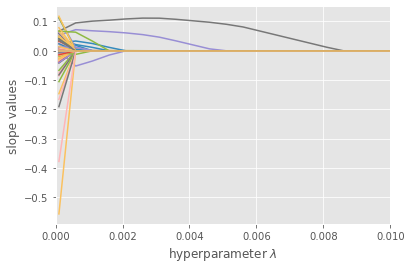

In [349]:
for name in lasso_coef_df.columns:
    plt.plot(lasso_coef_df.index, lasso_coef_df[name])
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xlim(0,.01)

In [357]:
vanishing_points = pd.Series([])
for name in lasso_coef_df.columns:
    reaches_zero = lasso_coef_df[name] == 0
    if sum(reaches_zero) > 0:
        vanishing_point = reaches_zero[reaches_zero == True].index[0]
        vanishing_points[name] = vanishing_point
    else:
        vanishing_points[name] = 100

<ipython-input-357-fcf74b8bca48>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vanishing_points = pd.Series([])


In [360]:
van_pts_desc = vanishing_points.sort_values(ascending = False)
van_pts_desc[van_pts_desc > .001]

OverallQual             0.0086
GrLivArea               0.0056
GarageCars              0.0051
TotalBsmtSF             0.0036
YearBuilt               0.0031
YearRemodAdd            0.0026
1stFlrSF                0.0026
Fireplaces              0.0021
GarageArea              0.0021
CentralAir_Y            0.0016
BsmtFinSF1              0.0016
GarageType_Attchd       0.0016
MSZoning_RL             0.0016
WoodDeckSF              0.0011
BsmtFinType1_GLQ        0.0011
BsmtFullBath            0.0011
BsmtFinType1_Unf        0.0011
KitchenQual_TA          0.0011
Neighborhood_NridgHt    0.0011
BsmtExposure_Gd         0.0011
OverallCond             0.0011
Neighborhood_Crawfor    0.0011
LotArea                 0.0011
dtype: float64

In [356]:
homes['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [252]:
homes['GarageCars'].unique()

array([2, 3, 1, 0, 4])

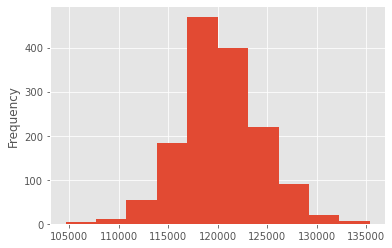

In [268]:
(10000*np.log(Y)).plot(kind = 'hist')

In [285]:
homes.isna().any(axis = 'index')

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [287]:
homes.columns[homes.isna().any(axis = 'index')]

#columns with missing values:
#LotFrontage

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

## COLUMNS WITH MISSING VALUES:

- LotFrontage:
    - Linear feet of street connected to property
    - Values between 21 and 313, with 259 missing

- Alley:
    - Type of alley access
    - Values: Grvl (gravel), Pave (paved), with 1369 missing
    


In [294]:
np.sort(homes.LotFrontage.unique())

array([ 21.,  24.,  30.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
        40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105.,
       106., 107., 108., 109., 110., 111., 112., 114., 115., 116., 118.,
       120., 121., 122., 124., 128., 129., 130., 134., 137., 138., 140.,
       141., 144., 149., 150., 152., 153., 160., 168., 174., 182., 313.,
        nan])

In [308]:
num_missing = homes.isna().sum(axis = 'index')
num_missing[num_missing > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [329]:
missing_dict = {}
for name in homes.columns:
    if homes[name].isna().sum() > 0:
        num_miss = homes[name].isna().sum()
        if homes[name].dtype == 'object':
            mask = ~homes[name].isna()
            values = homes[name][mask].unique().tolist()
            lst = [values, str(num_miss) + ' missing values']
        else:
            min_ = homes[name].min()
            max_ = homes[name].max()
            values = ['min: ' + str(min_), 'max: ' + str(max_)]
            lst = [values, str(num_miss) + ' missing values']
        missing_dict[name] = lst

for item in missing_dict.items():
    print(item[0] + ':\nValues:', item[1][0], '\n', item[1][1], '\n' + '-'*80)

LotFrontage:
Values: ['min: 21.0', 'max: 313.0'] 
 259 missing values 
--------------------------------------------------------------------------------
Alley:
Values: ['Grvl', 'Pave'] 
 1369 missing values 
--------------------------------------------------------------------------------
MasVnrType:
Values: ['BrkFace', 'None', 'Stone', 'BrkCmn'] 
 8 missing values 
--------------------------------------------------------------------------------
MasVnrArea:
Values: ['min: 0.0', 'max: 1600.0'] 
 8 missing values 
--------------------------------------------------------------------------------
BsmtQual:
Values: ['Gd', 'TA', 'Ex', 'Fa'] 
 37 missing values 
--------------------------------------------------------------------------------
BsmtCond:
Values: ['TA', 'Gd', 'Fa', 'Po'] 
 37 missing values 
--------------------------------------------------------------------------------
BsmtExposure:
Values: ['No', 'Gd', 'Mn', 'Av'] 
 38 missing values 
---------------------------------------------

## Ideas for imputation/dealing with missing data:


### Features to delete:

- Alley
- PoolQC (and maybe also PoolArea along with it)
- MiscFeatures
- GarageYrBlt
- Fence


### Features to impute:

- LotFrontage: with knn
- Electrical: with mode
- BsmtExposure: with knn
- MasVnrType: with knn
- MasVnrArea: with knn


### Features that could possibly be ranked/quantified, imputing NA with 0:

- BsmtQual (qual)
- BsmtCond (qual)
- BsmtFinType1 (bsmt fin)
- BsmtFinType2 (bsmt fin)
- FireplaceQu (qual)
- GarageFinish (grg fin)
- GarageQual (qual)
- GarageCond (qual)
- GarageType (grg type)

### Key for quality variables:

- Ex:	Excellent

- Gd:	Good

- TA:	Typical/Average

- Fa:	Fair

- Po:	Poor



### Key for basement finish variables:

- GLQ: good quality living quarters

- ALQ: average quality living quarters

- Unf: unfinished

- Rec: average quality rec room

- BLQ: below average living quarters

- LwQ: low quality



### Key for garage finish variables:

- Fin: Finished

- RFn: Rough Finished

- Unf: Unfinished


### Key for garage types:

- Attchd

- Detchd

- BuiltIn

- CarPort

- Basment

- 2Types

In [362]:
homes['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [364]:
homes['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [367]:
homes['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [368]:
homes[['MasVnrType', 'MasVnrArea']][homes['MasVnrType'].isna()]

MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN

In [61]:
qv = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po': 1}
def qual_rank(x):
    if x in qv.keys():
        return qv[x]
    else:
        return 0
    
bfv = {'GLQ': 5, 'ALQ': 4, 'Unf': 1, 'Rec':4 , 'BLQ': 3, 'LwQ': 2}
def bsmt_fin_rank(x):
    if x in bfv.keys():
        return bfv[x]
    else:
        return 0
    
gfv = {'RFn': 2, 'Unf': 1, 'Fin': 3}
def grg_fin_rank(x):
    if x in gfv.keys():
        return gfv[x]
    else:
        return 0
    
gtv = {'2Types': 3, 'Attchd': 4, 'Basment': 3, 'BuiltIn': 5, 'CarPort': 2, 'Detchd': 3}
def grg_type_rank(x):
    if x in gtv.keys():
        return gtv[x]

In [60]:
homes.groupby('GarageType').agg({'SalePrice': 'mean'})

SalePrice
GarageType               
2Types      151283.333333
Attchd      202892.656322
Basment     160570.684211
BuiltIn     254751.738636
CarPort     109962.111111
Detchd      134091.162791

In [444]:
homes2 = homes.copy()

In [389]:
qual = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
bsmt_fin = ['BsmtFinType1', 'BsmtFinType2']

for name in qual:
    homes2[name] = homes2[name].apply(qual_rank)

for name in bsmt_fin:
    homes2[name] = homes2[name].apply(bsmt_fin_rank)
    
homes2['GarageFinish'] = homes2['GarageFinish'].apply(grg_fin_rank)

In [445]:
missing_cols = ['BsmtQual', 'BsmtCond', 'FireplaceQu',
           'GarageQual', 'GarageCond', 'BsmtFinType1',
           'BsmtFinType2', 'GarageFinish', 'GarageType',
           'BsmtExposure']

for name in missing_cols:
    homes2[name] = homes2[name].fillna('None')

In [446]:
homes2 = homes2.drop(['Alley', 'PoolArea', 'PoolQC', 'MiscFeature', 'GarageYrBlt', 'Fence'], axis = 1)

In [447]:
homes2['Electrical'] = homes2['Electrical'].fillna(homes2['Electrical'].mode()[0])

In [ ]:
pd.get_dummies

In [395]:
from sklearn.impute import KNNImputer

In [411]:
imputer = KNNImputer(n_neighbors = 9, copy = False)

In [412]:
imputer.fit_transform(homes2)


#- LotFrontage: with knn
#- BsmtExposure: with knn
#- MasVnrType: with knn
#- MasVnrArea: with knn

ValueError: could not convert string to float: 'RL'

In [451]:
homes2.columns[homes2.isna().any(axis = 0)]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea'], dtype='object')

In [427]:
homes2.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [432]:
testing = homes2.copy().drop('MasVnrType', axis = 1)
imputer.fit_transform(testing)

ValueError: could not convert string to float: 'RL'

In [438]:
homes2 = homes2[~homes2['MasVnrType'].isna()]

In [435]:
homes2['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [457]:
homes2.to_csv('homes2.csv')

In [105]:
homes_imputed = pd.read_csv('homes_imputed.csv')

In [106]:
homes_imputed.drop(['Unnamed: 0', 'X', 'Id'], axis = 1, inplace = True)

In [107]:
homes_imputed

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL           65     8450   Pave      Reg         Lvl   
1             20       RL           80     9600   Pave      Reg         Lvl   
2             60       RL           68    11250   Pave      IR1         Lvl   
3             70       RL           60     9550   Pave      IR1         Lvl   
4             60       RL           84    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL           62     7917   Pave      Reg         Lvl   
1456          20       RL           85    13175   Pave      Reg         Lvl   
1457          70       RL           66     9042   Pave      Reg         Lvl   
1458          20       RL           68     9717   Pave      Reg         Lvl   
1459          20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch X3SsnPorch  \
0       AllPub    Inside       Gtl  ...          61             0          0   
1       AllPub       FR2       Gtl  ...           0             0          0   
2       AllPub    Inside       Gtl  ...          42             0          0   
3       AllPub    Corner       Gtl  ...          35           272          0   
4       AllPub       FR2       Gtl  ...          84             0          0   
...        ...       ...       ...  ...         ...           ...        ...   
1455    AllPub    Inside       Gtl  ...          40             0          0   
1456    AllPub    Inside       Gtl  ...           0             0          0   
1457    AllPub    Inside       Gtl  ...          60             0          0   
1458    AllPub    Inside       Gtl  ...           0           112          0   
1459    AllPub    Inside       Gtl  ...          68             0          0   

     ScreenPorch MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0              0       0       2    2008        WD         Normal  12.247694  
1              0       0       5    2007        WD         Normal  12.109011  
2              0       0       9    2008        WD         Normal  12.317167  
3              0       0       2    2006        WD        Abnorml  11.849398  
4              0       0      12    2008        WD         Normal  12.429216  
...          ...     ...     ...     ...       ...            ...        ...  
1455           0       0       8    2007        WD         Normal  12.072541  
1456           0       0       2    2010        WD         Normal  12.254863  
1457           0    2500       5    2010        WD         Normal  12.493130  
1458           0       0       4    2010        WD         Normal  11.864462  
1459           0       0       6    2008        WD         Normal  11.901583  

[1460 rows x 74 columns]

In [6]:
homes_dummified = pd.get_dummies(homes_imputed, drop_first = True)

In [7]:
X = homes_dummified.copy().drop('SalePrice', axis = 1)
Y = homes_dummified.copy()['SalePrice']

(0.0, 1.0)

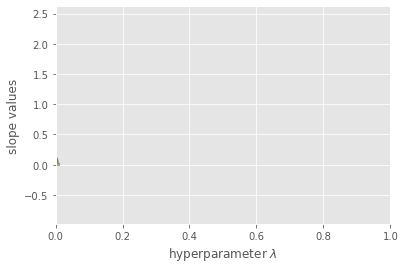

In [38]:
alphas = np.linspace(0.00001, .01001, 101)

lasso = Lasso()
lasso.set_params(normalize = True)
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha = alpha)
    lasso.fit(X, Y)
    coefs_lasso.append(lasso.coef_)
    
lasso_coef_df = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)

for name in lasso_coef_df.columns:
    plt.plot(lasso_coef_df.index, lasso_coef_df[name])
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.xlim(0,1)

In [39]:
lasso_coef_df

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
0.00001   -0.000220     0.000226  2.508336e-06     0.046374     0.037099   
0.00011   -0.000321    -0.000000  1.360602e-06     0.068541     0.032426   
0.00021   -0.000305     0.000000  1.320538e-06     0.076938     0.029934   
0.00031   -0.000211     0.000000  1.137681e-06     0.084146     0.026391   
0.00041   -0.000108     0.000000  9.466806e-07     0.088774     0.021490   
...             ...          ...           ...          ...          ...   
0.00961   -0.000000     0.000000  0.000000e+00     0.000000    -0.000000   
0.00971   -0.000000     0.000000  0.000000e+00     0.000000    -0.000000   
0.00981   -0.000000     0.000000  0.000000e+00     0.000000    -0.000000   
0.00991   -0.000000     0.000000  0.000000e+00     0.000000    -0.000000   
0.01001   -0.000000     0.000000  0.000000e+00     0.000000    -0.000000   

         YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
0.00001   0.001551      0.000797    0.000006    0.000047    0.000039  ...   
0.00011   0.001260      0.000846    0.000000    0.000000    0.000000  ...   
0.00021   0.001362      0.000984    0.000000    0.000002    0.000000  ...   
0.00031   0.001301      0.001094    0.000000    0.000004    0.000000  ...   
0.00041   0.001218      0.001210    0.000000    0.000008    0.000000  ...   
...            ...           ...         ...         ...         ...  ...   
0.00961   0.000000      0.000000    0.000000    0.000000    0.000000  ...   
0.00971   0.000000      0.000000    0.000000    0.000000    0.000000  ...   
0.00981   0.000000      0.000000    0.000000    0.000000    0.000000  ...   
0.00991   0.000000      0.000000    0.000000    0.000000    0.000000  ...   
0.01001   0.000000      0.000000    0.000000    0.000000    0.000000  ...   

         SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0.00001       -0.022761        0.007818      0.087888      0.061182   
0.00011       -0.000000        0.000000      0.076097      0.000000   
0.00021       -0.000000       -0.000000      0.047785      0.000000   
0.00031       -0.000000       -0.000000      0.026365      0.000000   
0.00041       -0.000000       -0.000000      0.015002      0.000000   
...                 ...             ...           ...           ...   
0.00961        0.000000       -0.000000      0.000000     -0.000000   
0.00971        0.000000       -0.000000      0.000000     -0.000000   
0.00981        0.000000       -0.000000      0.000000     -0.000000   
0.00991        0.000000       -0.000000      0.000000     -0.000000   
0.01001        0.000000       -0.000000      0.000000     -0.000000   

         SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0.00001     -0.01382                0.09564              0.059563   
0.00011     -0.00000                0.00000             -0.000000   
0.00021     -0.00000                0.00000             -0.000000   
0.00031     -0.00000               -0.00000             -0.000000   
0.00041     -0.00000               -0.00000             -0.000000   
...              ...                    ...                   ...   
0.00961     -0.00000               -0.00000             -0.000000   
0.00971     -0.00000               -0.00000             -0.000000   
0.00981     -0.00000               -0.00000             -0.000000   
0.00991     -0.00000               -0.00000             -0.000000   
0.01001     -0.00000               -0.00000             -0.000000   

         SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0.00001              0.004302              0.063276               0.008053  
0.00011             -0.000000              0.033711               0.000000  
0.00021             -0.000000              0.012600               0.000000  
0.00031             -0.000000              0.000000               0.000000  
0.00041             -0.000000              0.000000               0.000000  
...                       .

In [40]:
vanishing_points = pd.Series([])
for name in lasso_coef_df.columns:
    reaches_zero = lasso_coef_df[name] == 0
    if sum(reaches_zero) > 0:
        vanishing_point = reaches_zero[reaches_zero == True].index[0]
        vanishing_points[name] = vanishing_point
    else:
        vanishing_points[name] = 100

<ipython-input-40-fcf74b8bca48>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vanishing_points = pd.Series([])


In [63]:
vanishing_points[vanishing_points > .00021].sort_values(ascending = False)

OverallQual          0.00861
GrLivArea            0.00561
GarageCars           0.00491
TotalBsmtSF          0.00341
YearBuilt            0.00291
YearRemodAdd         0.00251
Fireplaces           0.00201
FireplaceQu_None     0.00181
GarageArea           0.00181
CentralAir_Y         0.00161
MSZoning_RL          0.00151
GarageType_Attchd    0.00121
BsmtFullBath         0.00111
KitchenQual_TA       0.00101
dtype: float64

In [156]:
vanishing_points[vanishing_points > .00021].sort_values(ascending = False).shape

(59,)

In [497]:
(homes['YearBuilt'] - homes['GarageYrBlt']).value_counts()

 0.0     1089
-1.0       52
-2.0       16
-3.0       10
-8.0        7
         ... 
-42.0       1
 2.0        1
-89.0       1
-44.0       1
-74.0       1
Length: 88, dtype: int64

In [228]:
lasso = Lasso(normalize = True, max_iter = 100000)

In [1]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.linspace(0.00001, .01001, 101)}
gs = GridSearchCV(estimator = lasso, param_grid = param_grid, cv = 5, scoring = 'r2')

NameError: name 'np' is not defined

In [81]:
X_important = X[important_cols]

In [238]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000, normalize=True),
             param_grid={'alpha': array([1.000e-05, 1.100e-04, 2.100e-04, 3.100e-04, 4.100e-04, 5.100e-04,
       6.100e-04, 7.100e-04, 8.100e-04, 9.100e-04, 1.010e-03, 1.110e-03,
       1.210e-03, 1.310e-03, 1.410e-03, 1.510e-03, 1.610e-03, 1.710e-03,
       1.810e-03, 1.910e-03, 2.010e-03, 2.110e-03, 2.210e-03, 2.310e-03,
       2.410e-03, 2.510e-...
       6.610e-03, 6.710e-03, 6.810e-03, 6.910e-03, 7.010e-03, 7.110e-03,
       7.210e-03, 7.310e-03, 7.410e-03, 7.510e-03, 7.610e-03, 7.710e-03,
       7.810e-03, 7.910e-03, 8.010e-03, 8.110e-03, 8.210e-03, 8.310e-03,
       8.410e-03, 8.510e-03, 8.610e-03, 8.710e-03, 8.810e-03, 8.910e-03,
       9.010e-03, 9.110e-03, 9.210e-03, 9.310e-03, 9.410e-03, 9.510e-03,
       9.610e-03, 9.710e-03, 9.810e-03, 9.910e-03, 1.001e-02])},
             scoring='r2')

In [239]:
bestimator = gs.best_estimator_

In [232]:
bestimator.score(X, Y)

0.9087824902337905

In [240]:
print(gs.best_score_)
print(gs.best_params_)

0.8886909798776909
{'alpha': 0.00011}


In [237]:
X_train = X.iloc[:1168, ]
X_test = X.iloc[1168:, ]
Y_train = Y.iloc[:1168, ]
Y_test = Y.iloc[1168:, ]

In [241]:
print(bestimator.score(X_train, Y_train))
print(bestimator.score(X_test, Y_test)) #using all predictors overfits by a lot

0.9278569322090553
0.7608366925670446


In [126]:
lasso = Lasso()

In [154]:
train_scores = []
test_scores = []
for alpha in np.linspace(.00001, .01001, 1001):
    lasso.set_params(normalize = True, alpha = alpha)
    lasso.fit(X_train, Y_train)
    train_scores.append(lasso.score(X_train, Y_train))
    test_scores.append(lasso.score(X_test, Y_test))
    
scores_df = pd.DataFrame({'train_scores': train_scores,
                         'test_scores': test_scores,
                         'alpha': np.linspace(.00001, .01001, 1001)})

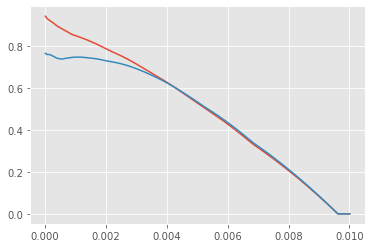

In [155]:
plt.plot(scores_df['alpha'], scores_df['train_scores'])
plt.plot(scores_df['alpha'], scores_df['test_scores'])

In [139]:
overfit = scores_df['train_scores'] - scores_df['test_scores']

In [153]:
scores_df.iloc[20]

train_scores    0.780758
test_scores     0.728390
alpha           0.002100
Name: 20, dtype: float64

In [151]:
overfit[:50]

0     0.167937
1     0.161422
2     0.158686
3     0.153508
4     0.148204
5     0.138943
6     0.127828
7     0.117801
8     0.108326
9     0.102729
10    0.097492
11    0.092888
12    0.088375
13    0.083950
14    0.079336
15    0.074680
16    0.070116
17    0.065655
18    0.061294
19    0.056894
20    0.052367
21    0.048391
22    0.044776
23    0.041255
24    0.037824
25    0.034490
26    0.031251
27    0.028101
28    0.025049
29    0.022091
30    0.019269
31    0.016808
32    0.014431
33    0.012139
34    0.009938
35    0.007995
36    0.006334
37    0.004777
38    0.003463
39    0.002225
40    0.001064
41   -0.000020
42   -0.001029
43   -0.001958
44   -0.002811
45   -0.003480
46   -0.003760
47   -0.004012
48   -0.004236
49   -0.004431
dtype: float64

In [147]:
scores_df

train_scores  test_scores   alpha
0         0.928879     0.760941  0.0001
1         0.918856     0.757434  0.0002
2         0.908259     0.749573  0.0003
3         0.896423     0.742916  0.0004
4         0.887732     0.739528  0.0005
...            ...          ...     ...
996       0.000000    -0.000763  0.0997
997       0.000000    -0.000763  0.0998
998       0.000000    -0.000763  0.0999
999       0.000000    -0.000763  0.1000
1000      0.000000    -0.000763  0.1001

[1001 rows x 3 columns]

In [160]:
X_train.columns[bestimator.coef_ == 0]

Index(['LotFrontage', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtHalfBath', 'EnclosedPorch', 'MiscVal', 'MoSold', 'MSZoning_RH',
       'LandContour_Low',
       ...
       'GarageCond_Gd', 'GarageCond_Po', 'PavedDrive_P', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca'],
      dtype='object', length=121)

MSSubClass
--------------------------------------------------
LotFrontage
--------------------------------------------------
LotArea
--------------------------------------------------
OverallQual
--------------------------------------------------
OverallCond
--------------------------------------------------
YearBuilt
--------------------------------------------------
YearRemodAdd
--------------------------------------------------
MasVnrArea
--------------------------------------------------
BsmtFinSF1
--------------------------------------------------
BsmtFinSF2
--------------------------------------------------
BsmtUnfSF
--------------------------------------------------
TotalBsmtSF
--------------------------------------------------
X1stFlrSF
--------------------------------------------------
X2ndFlrSF
--------------------------------------------------
LowQualFinSF
--------------------------------------------------
GrLivArea
--------------------------------------------------
BsmtFull

--------------------------------------------------
BsmtQual_Fa
--------------------------------------------------
BsmtQual_Gd
--------------------------------------------------
BsmtQual_None
--------------------------------------------------
BsmtQual_TA
--------------------------------------------------
BsmtCond_Gd
--------------------------------------------------
BsmtCond_None
--------------------------------------------------
BsmtCond_Po
--------------------------------------------------
BsmtCond_TA
--------------------------------------------------
BsmtExposure_Gd
--------------------------------------------------
BsmtExposure_Mn
--------------------------------------------------
BsmtExposure_No
--------------------------------------------------
BsmtExposure_None
--------------------------------------------------
BsmtFinType1_BLQ
--------------------------------------------------
BsmtFinType1_GLQ
--------------------------------------------------
BsmtFinType1_LwQ
------------------

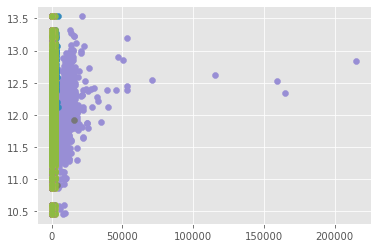

In [163]:
for name in X_train.columns:
    print(name)
    plt.scatter(X_train[name], Y_train)
    print('-'*50)

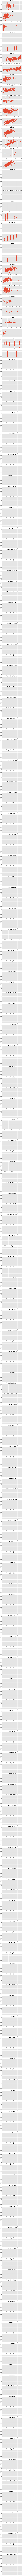

In [191]:
fig, axs = plt.subplots(X_train.columns.shape[0], figsize = (6, 800))
for i in range(X_train.columns.shape[0]):
    axs[i].scatter(x = X_train[X_train.columns[i]], y = Y_train)
    axs[i].set_title(X_train.columns[i])

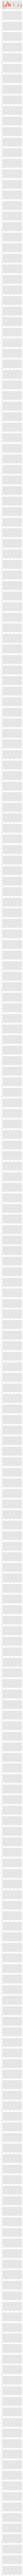

In [188]:
corrs = []
for name in X.columns:
    corrs.append(pd.corrs)

In [193]:
pd.corr(X['OverallCond'], Y)

AttributeError: module 'pandas' has no attribute 'corr'

In [10]:
corrs = []
for name in X.columns:
    corrs.append((name, pd.concat([X[name], Y], axis = 1).corr().iloc[0,1]))

In [48]:
corrs_sorted

[('OverallQual', 0.8171844179216826),
 ('GrLivArea', 0.7009266525441312),
 ('GarageCars', 0.6806248074360437),
 ('GarageArea', 0.6508875559020038),
 ('TotalBsmtSF', 0.6121339753697871),
 ('X1stFlrSF', 0.5969810450343737),
 ('ExterQual_TA', -0.5958814190862862),
 ('FullBath', 0.5947705420075337),
 ('YearBuilt', 0.5865702403842267),
 ('YearRemodAdd', 0.5656078325911801),
 ('KitchenQual_TA', -0.5382371448464486),
 ('TotRmsAbvGrd', 0.5344222037231218),
 ('Foundation_PConc', 0.530839998485723),
 ('FireplaceQu_None', -0.510025575499284),
 ('ExterQual_Gd', 0.5096749069312427),
 ('Fireplaces', 0.48944942759848187),
 ('BsmtQual_TA', -0.47761087083292975),
 ('BsmtFinType1_GLQ', 0.44076329498137473),
 ('GarageFinish_Unf', -0.43201123360275634),
 ('MasVnrArea', 0.42934361607779026),
 ('GarageType_Attchd', 0.4157871494173005),
 ('KitchenQual_Gd', 0.40660147283679426),
 ('MasVnrType_None', -0.39129745003126354),
 ('GarageType_Detchd', -0.3886379669268394),
 ('BsmtFinSF1', 0.3720230735670876),
 ('Gar

In [11]:
corrs_sorted = sorted(corrs, key = lambda t: -np.abs(t[1])) #

In [209]:
high_corr_features = list(map(lambda x: x[0], filter(lambda y: np.abs(y[1]) > 0.4, corrs_sorted)))

In [210]:
high_corr_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'X1stFlrSF',
 'ExterQual_TA',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'KitchenQual_TA',
 'TotRmsAbvGrd',
 'Foundation_PConc',
 'FireplaceQu_None',
 'ExterQual_Gd',
 'Fireplaces',
 'BsmtQual_TA',
 'BsmtFinType1_GLQ',
 'GarageFinish_Unf',
 'MasVnrArea',
 'GarageType_Attchd',
 'KitchenQual_Gd']

In [213]:
df_hicorr = homes_dummified.copy()
df_hicorr = df_hicorr[high_corr_features + ['SalePrice']]

In [214]:
df_hicorr

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  X1stFlrSF  \
0               7       1710           2         548          856        856   
1               6       1262           2         460         1262       1262   
2               7       1786           2         608          920        920   
3               7       1717           3         642          756        961   
4               8       2198           3         836         1145       1145   
...           ...        ...         ...         ...          ...        ...   
1455            6       1647           2         460          953        953   
1456            6       2073           2         500         1542       2073   
1457            7       2340           1         252         1152       1188   
1458            5       1078           1         240         1078       1078   
1459            5       1256           1         276         1256       1256   

      ExterQual_TA  FullBath  YearBuilt  YearRemodAdd  ...  FireplaceQu_None  \
0                0         2       2003          2003  ...                 1   
1                1         2       1976          1976  ...                 0   
2                0         2       2001          2002  ...                 0   
3                1         1       1915          1970  ...                 0   
4                0         2       2000          2000  ...                 0   
...            ...       ...        ...           ...  ...               ...   
1455             1         2       1999          2000  ...                 0   
1456             1         2       1978          1988  ...                 0   
1457             0         2       1941          2006  ...                 0   
1458             1         1       1950          1996  ...                 1   
1459             0         1       1965          1965  ...                 1   

      ExterQual_Gd  Fireplaces  BsmtQual_TA  BsmtFinType1_GLQ  \
0                1           0            0                 1   
1                0           1            0                 0   
2                1           1            0                 1   
3                0           1            1                 0   
4                1           1            0                 1   
...            ...         ...          ...               ...   
1455             0           1            0                 0   
1456             0           2            0                 0   
1457             0           2            1                 1   
1458             0           0            1                 1   
1459             1           0            1                 0   

      GarageFinish_Unf  MasVnrArea  GarageType_Attchd  KitchenQual_Gd  \
0                    0         196                  1               1   
1                    0           0                  1               0   
2                    0         162                  1               1   
3                    1           0                  0               1   
4                    0         350                  1               1   
...                ...         ...                ...             ...   
1455                 0           0                  1               0   
1456                 1         119                  1               0   
1457                 0           0                  1               1   
1458                 1           0                  1               1   
1459                 0           0                  1               0   

      SalePrice  
0     12.247694  
1     12.109011  
2     12.317167  
3     11.849398  
4     12.429216  
...         ...  
1455  12.072541  
1456  12.254863  
1457  12.493130  
1458  11.864462  
1459  11.901583  

[1460 rows x 23 columns]

In [216]:
Y.mean()

12.024050901109373

In [217]:
Y.std()

0.39945186826116363

In [218]:
outlier_mask = np.abs(Y - Y.mean()) / Y.std() > 3

In [220]:
Y[outlier_mask]

30      10.596635
440     13.226723
495     10.460242
533     10.578980
691     13.534473
803     13.275828
898     13.323927
916     10.471950
968     10.542706
1046    13.229568
1169    13.345507
1182    13.521139
Name: SalePrice, dtype: float64

In [223]:
X_hicorr = df_hicorr.copy().drop('SalePrice', axis = 1)

In [224]:
Y_hicorr = df_hicorr.copy()['SalePrice']

In [258]:
lasso = Lasso(normalize = True, max_iter = 100000)
param_grid = {'alpha': np.linspace(0.00001, .00101, 1001)}
gs = GridSearchCV(estimator = lasso, param_grid = param_grid, cv = 5, scoring = 'r2')

In [8]:
from sklearn.model_selection import train_test_split

In [260]:
Xhc_train, Xhc_test, Yhc_train, Yhc_test = train_test_split(X_hicorr, Y_hicorr, test_size=0.2, random_state=42)

In [261]:
gs.fit(Xhc_train, Yhc_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000, normalize=True),
             param_grid={'alpha': array([1.000e-05, 1.100e-05, 1.200e-05, ..., 1.008e-03, 1.009e-03,
       1.010e-03])},
             scoring='r2')

In [265]:
bestimator = gs.best_estimator_

In [269]:
gs.best_params_

{'alpha': 0.000153}

In [266]:
bestimator.score(Xhc_train, Yhc_train)

0.830405596695871

In [267]:
bestimator.score(Xhc_test, Yhc_test)

0.8485038913807901

In [270]:
lasso.set_params(alpha = gs.best_params_['alpha'], normalize = True, max_iter = 100000)

Lasso(alpha=0.000153, max_iter=100000, normalize=True)

In [271]:
lasso.fit(Xhc_train, Yhc_train)

Lasso(alpha=0.000153, max_iter=100000, normalize=True)

In [272]:
lasso.score(Xhc_train, Yhc_train)

0.830405596695871

In [273]:
lasso.score(Xhc_test, Yhc_test)

0.8485038913807901

In [274]:
lasso.coef_

array([ 8.01860053e-02,  1.67688354e-04,  6.83300717e-02,  9.62629114e-05,
        6.76823330e-05,  1.05381789e-05, -0.00000000e+00,  0.00000000e+00,
        1.16355714e-03,  2.02528886e-03, -2.08239354e-02,  9.98450805e-03,
        0.00000000e+00, -9.29748371e-03,  0.00000000e+00,  6.36723764e-02,
       -0.00000000e+00,  4.60888323e-02, -8.72991269e-03,  0.00000000e+00,
        4.70409928e-02,  0.00000000e+00])

In [ ]:
# Idea:
# go down list of highly correlated features
# take first n of them
# cross-validate
# see where over/underfitting is minimized

In [12]:
lasso = Lasso(normalize = True, max_iter = 1000)
param_grid = {'alpha': np.linspace(0.00001, .00101, 101)}
gs = GridSearchCV(estimator = lasso, param_grid = param_grid, cv = 5, scoring = 'r2')

trainscores = []
testscores = []
bestalphas = []

for n in range(len(corrs_sorted)-1):
    features = [x[0] for x in corrs_sorted[:n+1]]
    df_hicorr = homes_dummified[features]
    X_train, X_test, Y_train, Y_test = train_test_split(df_hicorr, Y, test_size = .2, random_state = 42)
    gs.fit(X_train, Y_train)
    bestimator = gs.best_estimator_
    bestalphas.append(gs.best_params_['alpha'])
    trainscores.append(bestimator.score(X_train, Y_train))
    testscores.append(bestimator.score(X_test, Y_test))

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9834833985690965, tolerance: 0.014396336485849776
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9834150779798199, tolerance: 0.014396336485849776
  model = cd_fast.enet_coordinate_descent(
/Users/nick/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9839448332646157, tolerance: 0.014396336485849776
  model = cd_fast.enet_coordinate_descent(


In [13]:
dfdf = pd.DataFrame({'trainscores': trainscores, 'testscores': testscores, 'bestalphas': bestalphas})
dfdf

trainscores  testscores  bestalphas
0       0.652757    0.713126     0.00005
1       0.725250    0.785327     0.00001
2       0.770205    0.797927     0.00005
3       0.771407    0.799952     0.00006
4       0.783757    0.822786     0.00010
..           ...         ...         ...
238     0.901254    0.890588     0.00017
239     0.901254    0.890588     0.00017
240     0.901254    0.890588     0.00017
241     0.901254    0.890588     0.00017
242     0.901254    0.890588     0.00017

[243 rows x 3 columns]

(0.8, 0.95)

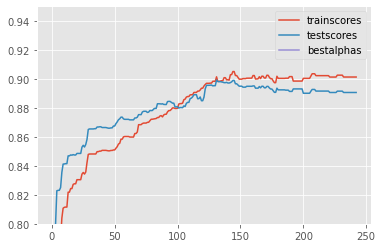

In [22]:
dfdf.plot()
plt.ylim(.8,.95)

In [24]:
dfdf.iloc[101]

trainscores    0.882656
testscores     0.879840
bestalphas     0.000040
Name: 101, dtype: float64

In [28]:
xxxx = homes_dummified[[x[0] for x in corrs_sorted[:100]]]

In [33]:
lasso = Lasso(alpha = .00004, normalize = True)

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(xxxx, Y, test_size = .2, random_state = 124)
lasso.fit(xtrain, ytrain)

Lasso(alpha=4e-05, normalize=True)

In [50]:
lasso.score(xtrain, ytrain)

0.8820847688305459

In [51]:
lasso.score(xtest, ytest)

0.8793864094031586

In [52]:
lasso.coef_

array([ 6.66038122e-02,  1.55563156e-04,  4.91509910e-02,  1.86873582e-05,
        0.00000000e+00,  1.89885366e-05, -6.67256930e-03,  3.03529222e-02,
       -0.00000000e+00,  1.38330391e-03, -7.68110282e-02,  1.21901230e-02,
        5.54668560e-03, -3.13039489e-03,  0.00000000e+00,  3.03343101e-02,
       -2.15320471e-02,  2.16172408e-02, -5.58943031e-04, -0.00000000e+00,
        3.71484646e-02, -4.66892166e-02,  1.14055440e-02,  0.00000000e+00,
        1.56318815e-06, -0.00000000e+00, -9.01743764e-05,  1.19431358e-01,
        8.26428020e-02,  0.00000000e+00,  1.72649274e-02,  0.00000000e+00,
        6.24528175e-03,  0.00000000e+00, -2.76907824e-02, -5.22774262e-03,
        7.81752742e-05, -1.46397731e-02,  3.11837268e-02,  0.00000000e+00,
       -5.39163860e-02, -3.18497011e-16, -1.96272668e-17, -2.76566032e-17,
        1.09421124e-05,  0.00000000e+00, -0.00000000e+00,  3.25687726e-02,
        3.23117146e-03,  2.63096083e-02,  4.73006021e-02, -5.07783287e-03,
        1.08003895e-01,  

In [54]:
np.array([x[0] for x in corrs_sorted[:100]])[lasso.coef_ != 0].shape

(78,)

In [39]:
homes_dummified.columns[homes_dummified.columns.isin([x[0] for x in corrs_sorted[:100]])]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF',
       'X2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'MasVnrType_BrkFace', 'MasVnrType_None'

In [43]:
xtrain

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  X1stFlrSF  \
318             7       2646           3         656         1347       1372   
580             6       1429           2         572         1144       1429   
961             6       2872           2         619         1330       1542   
78              4       1768           0           0         1768       1768   
5               5       1362           2         480          796        796   
...           ...        ...         ...         ...          ...        ...   
1041            6       1632           2         484          800        800   
1122            4        960           1         288          672        960   
1346            7       2156           2         508         1568       2156   
1406            5        768           2         396          768        768   
1389            6       1218           2         440          735        869   

      ExterQual_TA  FullBath  YearBuilt  YearRemodAdd  ...  BsmtQual_Fa  \
318              0         2       1993          1993  ...            0   
580              1         1       1960          1987  ...            0   
961              1         2       1977          1995  ...            0   
78               1         2       1968          1968  ...            0   
5                1         1       1993          1995  ...            0   
...            ...       ...        ...           ...  ...          ...   
1041             1         1       1966          2000  ...            0   
1122             1         1       1956          1956  ...            0   
1346             1         2       1968          2003  ...            0   
1406             1         1       1972          2007  ...            0   
1389             1         1       1941          1950  ...            0   

      Foundation_Slab  Neighborhood_MeadowV  Heating_Grav  EnclosedPorch  \
318                 0                     0             0            144   
580                 0                     0             0              0   
961                 0                     0             0              0   
78                  0                     0             0              0   
5                   0                     0             0              0   
...               ...                   ...           ...            ...   
1041                0                     0             0              0   
1122                0                     0             0              0   
1346                0                     0             0              0   
1406                0                     0             0              0   
1389                0                     0             0              0   

      LotConfig_CulDSac  KitchenAbvGr  Neighborhood_Timber  BsmtCond_TA  \
318                   0             1                    0            1   
580                   1             1                    0            1   
961                   0             1                    0            0   
78                    0             2                    0            1   
5                     0             1                    0            1   
...                 ...           ...                  ...          ...   
1041                  0             1                    0            1   
1122                  0             1                    0            1   
1346                  1             1                    0            1   
1406                  0             1                    0            1   
1389                  0             1                    0            0   

      BsmtFinType1_Rec  
318                  0  
580                  0  
961                  0  
78                   0  
5                    0  
...                ...  
1041                 0  
1122                 0  
1346                 0  
1406                 0  
1389                 0  

[1168 rows x 100 columns]

In [55]:
homes_imputed

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL           65     8450   Pave      Reg         Lvl   
1             20       RL           80     9600   Pave      Reg         Lvl   
2             60       RL           68    11250   Pave      IR1         Lvl   
3             70       RL           60     9550   Pave      IR1         Lvl   
4             60       RL           84    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL           62     7917   Pave      Reg         Lvl   
1456          20       RL           85    13175   Pave      Reg         Lvl   
1457          70       RL           66     9042   Pave      Reg         Lvl   
1458          20       RL           68     9717   Pave      Reg         Lvl   
1459          20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch X3SsnPorch  \
0       AllPub    Inside       Gtl  ...          61             0          0   
1       AllPub       FR2       Gtl  ...           0             0          0   
2       AllPub    Inside       Gtl  ...          42             0          0   
3       AllPub    Corner       Gtl  ...          35           272          0   
4       AllPub       FR2       Gtl  ...          84             0          0   
...        ...       ...       ...  ...         ...           ...        ...   
1455    AllPub    Inside       Gtl  ...          40             0          0   
1456    AllPub    Inside       Gtl  ...           0             0          0   
1457    AllPub    Inside       Gtl  ...          60             0          0   
1458    AllPub    Inside       Gtl  ...           0           112          0   
1459    AllPub    Inside       Gtl  ...          68             0          0   

     ScreenPorch MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0              0       0       2    2008        WD         Normal  12.247694  
1              0       0       5    2007        WD         Normal  12.109011  
2              0       0       9    2008        WD         Normal  12.317167  
3              0       0       2    2006        WD        Abnorml  11.849398  
4              0       0      12    2008        WD         Normal  12.429216  
...          ...     ...     ...     ...       ...            ...        ...  
1455           0       0       8    2007        WD         Normal  12.072541  
1456           0       0       2    2010        WD         Normal  12.254863  
1457           0    2500       5    2010        WD         Normal  12.493130  
1458           0       0       4    2010        WD         Normal  11.864462  
1459           0       0       6    2008        WD         Normal  11.901583  

[1460 rows x 74 columns]

In [58]:
homes_imputed['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [109]:
qv = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po': 1}
def qual_rank(x):
    if x in qv.keys():
        return qv[x]
    else:
        return 0
    
bfv = {'GLQ': 5, 'ALQ': 4, 'Unf': 1, 'Rec':4 , 'BLQ': 3, 'LwQ': 2}
def bsmt_fin_rank(x):
    if x in bfv.keys():
        return bfv[x]
    else:
        return 0
    
gfv = {'RFn': 2, 'Unf': 1, 'Fin': 3}
def grg_fin_rank(x):
    if x in gfv.keys():
        return gfv[x]
    else:
        return 0
    
gtv = {'2Types': 3, 'Attchd': 4, 'Basment': 3, 'BuiltIn': 5, 'CarPort': 2, 'Detchd': 3}
def grg_type_rank(x):
    if x in gtv.keys():
        return gtv[x]
    else:
        return 0

In [110]:
qual = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
bsmt_fin = ['BsmtFinType1', 'BsmtFinType2']

for name in qual:
    homes_imputed[name] = homes_imputed[name].apply(qual_rank)

for name in bsmt_fin:
    homes_imputed[name] = homes_imputed[name].apply(bsmt_fin_rank)
    
homes_imputed['GarageFinish'] = homes_imputed['GarageFinish'].apply(grg_fin_rank)

homes_imputed['GarageType'] = homes_imputed['GarageType'].apply(grg_type_rank)

In [111]:
HI = pd.get_dummies(homes_imputed)

In [112]:
HI_X = HI.copy().drop('SalePrice', axis = 1)
HI_y = HI['SalePrice'].copy()

In [113]:
HI_X_train, HI_X_test, HI_y_train, HI_y_test = train_test_split(HI_X, HI_y, test_size = .2, random_state = 100)

In [114]:
param_grid = {'alpha': np.linspace(.00001, .01001, 1001)}

In [115]:
lasso = Lasso(normalize = True, max_iter = 100000)
gs = GridSearchCV(estimator = lasso, param_grid = param_grid, cv = 5, scoring = 'r2')
gs.fit(HI_X_train, HI_y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000, normalize=True),
             param_grid={'alpha': array([1.000e-05, 2.000e-05, 3.000e-05, ..., 9.990e-03, 1.000e-02,
       1.001e-02])},
             scoring='r2')

In [116]:
bestimator = gs.best_estimator_
bestimator.fit(HI_X_train, HI_y_train)
print(bestimator.score(HI_X_train, HI_y_train))
print(bestimator.score(HI_X_test, HI_y_test)) #overfitting

0.9442391297068329
0.8669407418422848


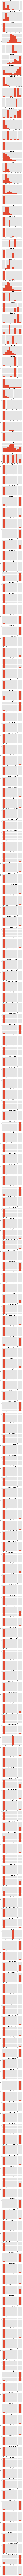

In [295]:
fig, axs = plt.subplots(HI_X_train.columns.shape[0], figsize = (6, 800))
for i in range(HI_X_train.columns.shape[0]):
    axs[i].hist(x = HI_X_train[HI_X_train.columns[i]])
    axs[i].set_title(HI_X_train.columns[i])

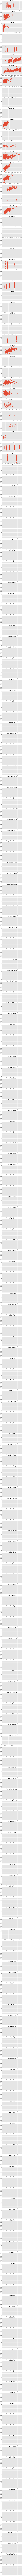

In [100]:
fig, axs = plt.subplots(HI_X_train.columns.shape[0], figsize = (6, 800))
for i in range(HI_X_train.columns.shape[0]):
    axs[i].scatter(x = HI_X_train[HI_X_train.columns[i]], y = HI_y_train)
    axs[i].set_title(HI_X_train.columns[i])

In [118]:
HI_X_train['GarageType'].value_counts()

4    685
3    337
5     74
0     65
2      7
Name: GarageType, dtype: int64

In [104]:
homes_imputed

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL           65     8450   Pave      Reg         Lvl   
1             20       RL           80     9600   Pave      Reg         Lvl   
2             60       RL           68    11250   Pave      IR1         Lvl   
3             70       RL           60     9550   Pave      IR1         Lvl   
4             60       RL           84    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL           62     7917   Pave      Reg         Lvl   
1456          20       RL           85    13175   Pave      Reg         Lvl   
1457          70       RL           66     9042   Pave      Reg         Lvl   
1458          20       RL           68     9717   Pave      Reg         Lvl   
1459          20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch X3SsnPorch  \
0       AllPub    Inside       Gtl  ...          61             0          0   
1       AllPub       FR2       Gtl  ...           0             0          0   
2       AllPub    Inside       Gtl  ...          42             0          0   
3       AllPub    Corner       Gtl  ...          35           272          0   
4       AllPub       FR2       Gtl  ...          84             0          0   
...        ...       ...       ...  ...         ...           ...        ...   
1455    AllPub    Inside       Gtl  ...          40             0          0   
1456    AllPub    Inside       Gtl  ...           0             0          0   
1457    AllPub    Inside       Gtl  ...          60             0          0   
1458    AllPub    Inside       Gtl  ...           0           112          0   
1459    AllPub    Inside       Gtl  ...          68             0          0   

     ScreenPorch MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0              0       0       2    2008        WD         Normal  12.247694  
1              0       0       5    2007        WD         Normal  12.109011  
2              0       0       9    2008        WD         Normal  12.317167  
3              0       0       2    2006        WD        Abnorml  11.849398  
4              0       0      12    2008        WD         Normal  12.429216  
...          ...     ...     ...     ...       ...            ...        ...  
1455           0       0       8    2007        WD         Normal  12.072541  
1456           0       0       2    2010        WD         Normal  12.254863  
1457           0    2500       5    2010        WD         Normal  12.493130  
1458           0       0       4    2010        WD         Normal  11.864462  
1459           0       0       6    2008        WD         Normal  11.901583  

[1460 rows x 74 columns]

In [122]:
pd.concat([HI_X_train['GarageType'], HI_y_train], axis = 1).corr()

GarageType  SalePrice
GarageType     1.00000    0.50793
SalePrice      0.50793    1.00000

0      1148
180       2
144       2
168       2
290       1
238       1
216       1
196       1
304       1
407       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: X3SsnPorch, dtype: int64

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [129]:
attempt = add_constant(HI_X_train)
S = pd.Series([variance_inflation_factor(attempt.values, i)
           for i in range(attempt.shape[1])],
          index=attempt.columns)

In [286]:
low_VIF = S[(S < 10)]
low_VIF = low_VIF.index
low_VIF = low_VIF[low_VIF != 'const']
low_VIF.shape

(31,)

In [287]:
restr_X_train = HI_X_train[low_VIF]
restr_X_test = HI_X_test[low_VIF]

In [291]:
param_grid = {'alpha': np.linspace(.00001, .0101, 1001), 'l1_ratio': np.linspace(.01, 1, 100)}
enet = ElasticNet(normalize = True, max_iter = 100000)
gs = GridSearchCV(estimator = enet, param_grid = param_grid, cv = 5, scoring = 'r2')
gs.fit(restr_X_train, HI_y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000, normalize=True),
             param_grid={'alpha': array([1.000000e-05, 2.009000e-05, 3.018000e-05, ..., 1.007982e-02,
       1.008991e-02, 1.010000e-02]),
                         'l1_ratio': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.3...2, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='r2')

In [292]:
bestimator = gs.best_estimator_
bestimator

ElasticNet(alpha=0.00018153, max_iter=100000, normalize=True)

In [293]:
bestimator.score(restr_X_train, HI_y_train)

0.8404961265316088

In [294]:
bestimator.score(restr_X_test, HI_y_test)

0.859876229585778

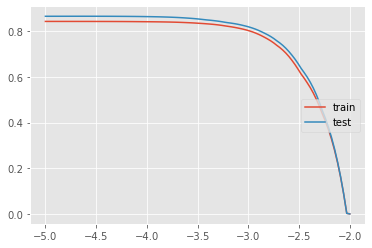

In [288]:
lasso = Lasso()
alphas = 10**np.linspace(-5, -2, 101)
ltestscores = []
ltrainscores = []
for alpha in alphas:
    lasso.set_params(alpha = alpha, normalize = True)
    lasso.fit(restr_X_train, HI_y_train)
    ltrainscores.append(lasso.score(restr_X_train, HI_y_train))
    ltestscores.append(lasso.score(restr_X_test, HI_y_test))
    
plt.plot(np.linspace(-5, -2, 101), ltrainscores, label = 'train')
plt.plot(np.linspace(-5, -2, 101), ltestscores, label = 'test')
plt.legend(loc = 7)

In [152]:
S.sort_values()[:30]

const            0.000000
X3SsnPorch       1.220208
MoSold           1.225563
ScreenPorch      1.275771
YrSold           1.278085
MiscVal          1.412050
BsmtHalfBath     1.427879
WoodDeckSF       1.501611
OpenPorchSF      1.686164
EnclosedPorch    1.719429
OverallCond      2.571270
BsmtFullBath     2.744406
MasVnrArea       2.987688
LotFrontage      3.197086
LotArea          3.223036
HalfBath         3.228965
BsmtFinType1     3.304151
BedroomAbvGr     3.383261
GarageFinish     3.427944
YearRemodAdd     3.502656
BsmtFinType2     3.800631
FullBath         4.088133
KitchenAbvGr     4.552031
BsmtCond         5.151706
OverallQual      5.473605
Fireplaces       5.803303
FireplaceQu      6.166182
TotRmsAbvGrd     6.464578
BsmtQual         6.930738
GarageType       7.464384
dtype: float64

In [170]:
gs.best_params_

{'alpha': 0.0001109}

In [176]:
corr_mtx = HI_X_train.corr()

In [180]:
correls = []
for i in range(239):
    for j in range(i+1, 239):
        correls.append((corr_mtx.index[i], corr_mtx.index[j], corr_mtx.iloc[i,j]))

In [192]:
pairs = sorted(correls, key = lambda triple: -abs(triple[2]))
pairs2 = pairs.copy()
pairs1

NameError: name 'pairs1' is not defined

In [198]:
for pair in pairs:
    if abs(pair[2]) > .8:
        first = pair[0]
        second = pair[1]
        pairs2 = [x for x in pairs2 if x[0] != first and x[0] != second
                 and x[1] != first and x[1] != second]
    
pairs2

[('Exterior2nd_Other', 'ExterCond_Po', nan)]

In [203]:
good_features = []
for i in range(239):
    correl = [corr_mtx.iloc[i,j] > .1 for j in range(i+1, 239)]
    if sum(correl) == 0:
        good_features.append(corr_mtx.columns[i])
good_features

['MoSold',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_Inside',
 'Condition2_Norm',
 'Condition2_RRNn',
 'Exterior2nd_Other',
 'ExterCond_Ex',
 'ExterCond_Gd',
 'ExterCond_Po',
 'Foundation_Wood',
 'BsmtExposure_Mn',
 'HeatingQC_Gd',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Typ',
 'PavedDrive_Y',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial']

In [210]:
HI_X_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
133           20           70     6853            8            5       2001   
290           60          120    15611            8            5       2006   
24            20           66     8246            5            8       1968   
1093          20           71     9230            5            8       1965   
1288         120           40     5664            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
802           60           63     8199            7            5       2005   
53            20           68    50271            9            5       1981   
350          120           68     7820            9            5       2007   
79            50           60    10440            5            6       1910   
792           60           92     9920            7            5       1996   

      YearRemodAdd  MasVnrArea  BsmtQual  BsmtCond  ...  SaleType_ConLw  \
133           2002         136         5         3  ...               0   
290           2006           0         4         3  ...               0   
24            2001           0         3         3  ...               0   
1093          1998         166         3         3  ...               0   
1288          2000           0         4         3  ...               0   
...            ...         ...       ...       ...  ...             ...   
802           2005           0         4         3  ...               0   
53            1987           0         5         3  ...               0   
350           2007         362         5         3  ...               0   
79            1981           0         3         3  ...               0   
792           1997           0         4         3  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
133              0             0            1                      0   
290              1             0            0                      0   
24               0             0            1                      0   
1093             0             0            1                      0   
1288             0             0            1                      0   
...            ...           ...          ...                    ...   
802              0             0            1                      0   
53               0             0            1                      0   
350              1             0            0                      0   
79               0             0            1                      0   
792              0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
133                       0                     0                     0   
290                       0                     0                     0   
24                        0                     0                     0   
1093                      0                     0                     0   
1288                      0                     0                     0   
...                     ...                   ...                   ...   
802                       0                     0                     0   
53                        0                     0                     0   
350                       0                     0                     0   
79                        0                     0                     0   
792                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
133                      1                      0  
290                      0                      1  
24                       1                      0  
1093                     1                      0  
1288                     1                      0  
...                    ...                    ...  
802                      1

In [213]:
# FEATURE IMPORTANCE FROM GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingRegressor

In [234]:
gbr = GradientBoostingRegressor(n_estimators = 5000)
gbr.fit(HI_X_train, HI_y_train)
feat_imp =  gbr.feature_importances_
gb_feat_imps = sorted(list(zip(HI_X_train.columns, feat_imp)), key = lambda x: -x[1])
gb_feat_imps

[('OverallQual', 0.414871806564455),
 ('GrLivArea', 0.15678876817363857),
 ('TotalBsmtSF', 0.051875135557296),
 ('GarageFinish', 0.03683359867756269),
 ('GarageCars', 0.0321221295562416),
 ('BsmtQual', 0.03199190090335665),
 ('YearBuilt', 0.029218337639139773),
 ('BsmtFinSF1', 0.024962541138150707),
 ('YearRemodAdd', 0.021469969753916827),
 ('GarageArea', 0.018575793355120426),
 ('FireplaceQu', 0.018442501489013836),
 ('LotArea', 0.01698146104987),
 ('OverallCond', 0.016670708833589946),
 ('X1stFlrSF', 0.011318558627220225),
 ('GarageType', 0.01079144061329215),
 ('CentralAir_Y', 0.009917591948260697),
 ('ExterQual_TA', 0.008299389862352045),
 ('MSZoning_C (all)', 0.006491308431825004),
 ('X2ndFlrSF', 0.006313144322651989),
 ('BsmtFinType1', 0.0038161769603931145),
 ('OpenPorchSF', 0.0037479360582055917),
 ('MSZoning_RM', 0.0035984343209229915),
 ('MSZoning_RL', 0.0035484599684774605),
 ('BsmtUnfSF', 0.003195596616975481),
 ('Neighborhood_Crawfor', 0.0028901709092117654),
 ('GarageQual

In [242]:
HFI = [x[0] for x in gb_feat_imps if x[1] >= 0.01]
HFI

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageFinish',
 'GarageCars',
 'BsmtQual',
 'YearBuilt',
 'BsmtFinSF1',
 'YearRemodAdd',
 'GarageArea',
 'FireplaceQu',
 'LotArea',
 'OverallCond',
 'X1stFlrSF',
 'GarageType']

In [251]:
from sklearn.metrics import r2_score

trains = []
tests = []

gbr.set_params(n_estimators=10100)

gbr.fit(HI_X_train[HFI], HI_y_train)
gen_train = gbr.staged_predict(HI_X_train[HFI])
gen_test  = gbr.staged_predict(HI_X_test[HFI])

for est in np.linspace(100, 10100, 51):
    gbr.set_params(n_estimators = est, subsample = .9)
    pred_y_train = next(gen_train)
    pred_y_test = next(gen_test)
    trains.append(r2_score(HI_y_train, pred_y_train))
    tests.append(r2_score(HI_y_test, pred_y_test))
    
plt.plot(np.linspace(100, 10100, 51), trains, label='train set $R^2$')
plt.plot(np.linspace(100, 10100, 51), tests, label='test set $R^2$')
plt.legend(loc=7)

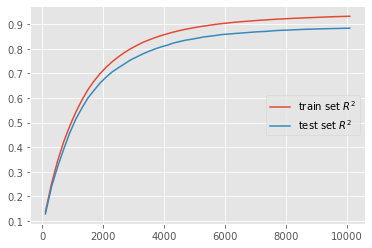

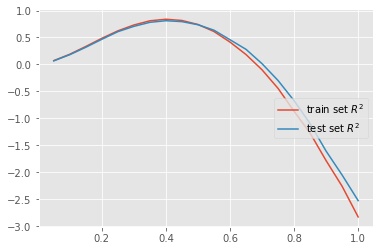

In [255]:
trains = []
tests = []

gbr.set_params(n_estimators=10100)

gbr.fit(HI_X_train[HFI], HI_y_train)
gen_train = gbr.staged_predict(HI_X_train[HFI])
gen_test  = gbr.staged_predict(HI_X_test[HFI])

for rate in np.linspace(.05, 1, 20):
    gbr.set_params(n_estimators = 10100, learning_rate = rate)
    pred_y_train = next(gen_train)
    pred_y_test = next(gen_test)
    trains.append(r2_score(HI_y_train, pred_y_train))
    tests.append(r2_score(HI_y_test, pred_y_test))
    
plt.plot(np.linspace(.05, 1, 20), trains, label='train set $R^2$')
plt.plot(np.linspace(.05, 1, 20), tests, label='test set $R^2$')
plt.legend(loc=7)

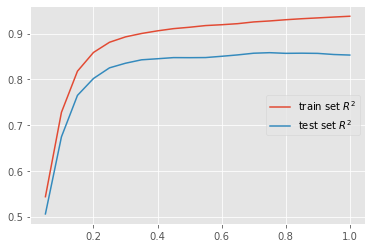

In [258]:
trains = []
tests = []

gbr.set_params(n_estimators=10100)

gbr.fit(HI_X_train[HFI], HI_y_train)
gen_train = gbr.staged_predict(HI_X_train[HFI])
gen_test  = gbr.staged_predict(HI_X_test[HFI])

for samp in np.linspace(.05, 1, 20):
    gbr.set_params(n_estimators = 10100, subsample = samp, learning_rate = .5)
    pred_y_train = next(gen_train)
    pred_y_test = next(gen_test)
    trains.append(r2_score(HI_y_train, pred_y_train))
    tests.append(r2_score(HI_y_test, pred_y_test))
    
plt.plot(np.linspace(.05, 1, 20), trains, label='train set $R^2$')
plt.plot(np.linspace(.05, 1, 20), tests, label='test set $R^2$')
plt.legend(loc=7)

In [299]:
homes_imputed2 = pd.read_csv('homes_imputed.csv')

In [301]:
homes_imputed2

Unnamed: 0     X    Id  MSSubClass MSZoning  LotFrontage  LotArea  \
0              1     0     1          60       RL           65     8450   
1              2     1     2          20       RL           80     9600   
2              3     2     3          60       RL           68    11250   
3              4     3     4          70       RL           60     9550   
4              5     4     5          60       RL           84    14260   
...          ...   ...   ...         ...      ...          ...      ...   
1455        1456  1455  1456          60       RL           62     7917   
1456        1457  1456  1457          20       RL           85    13175   
1457        1458  1457  1458          70       RL           66     9042   
1458        1459  1458  1459          20       RL           68     9717   
1459        1460  1459  1460          20       RL           75     9937   

     Street LotShape LandContour  ... OpenPorchSF EnclosedPorch X3SsnPorch  \
0      Pave      Reg         Lvl  ...          61             0          0   
1      Pave      Reg         Lvl  ...           0             0          0   
2      Pave      IR1         Lvl  ...          42             0          0   
3      Pave      IR1         Lvl  ...          35           272          0   
4      Pave      IR1         Lvl  ...          84             0          0   
...     ...      ...         ...  ...         ...           ...        ...   
1455   Pave      Reg         Lvl  ...          40             0          0   
1456   Pave      Reg         Lvl  ...           0             0          0   
1457   Pave      Reg         Lvl  ...          60             0          0   
1458   Pave      Reg         Lvl  ...           0           112          0   
1459   Pave      Reg         Lvl  ...          68             0          0   

     ScreenPorch MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
0              0       0      2   2008       WD         Normal  12.247694  
1              0       0      5   2007       WD         Normal  12.109011  
2              0       0      9   2008       WD         Normal  12.317167  
3              0       0      2   2006       WD        Abnorml  11.849398  
4              0       0     12   2008       WD         Normal  12.429216  
...          ...     ...    ...    ...      ...            ...        ...  
1455           0       0      8   2007       WD         Normal  12.072541  
1456           0       0      2   2010       WD         Normal  12.254863  
1457           0    2500      5   2010       WD         Normal  12.493130  
1458           0       0      4   2010       WD         Normal  11.864462  
1459           0       0      6   2008       WD         Normal  11.901583  

[1460 rows x 77 columns]

In [304]:
X = homes_imputed2.copy().drop('SalePrice', axis = 1)
y = homes_imputed.copy()['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [308]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lencoder = LabelEncoder()
lencoder.fit_transform(homes_imputed2.)

In [307]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y)
gbr.feature_importances_

ValueError: could not convert string to float: 'RL'

In [319]:
homes_imputed2.apply(lambda x: x.dtype, axis=0).value_counts()

object    77
dtype: int64

In [321]:
homes_imputed2.drop(['Unnamed: 0', 'X', 'Id'], axis  = 1, inplace = True)
homes_imputed2

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL           65     8450   Pave      Reg         Lvl   
1             20       RL           80     9600   Pave      Reg         Lvl   
2             60       RL           68    11250   Pave      IR1         Lvl   
3             70       RL           60     9550   Pave      IR1         Lvl   
4             60       RL           84    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL           62     7917   Pave      Reg         Lvl   
1456          20       RL           85    13175   Pave      Reg         Lvl   
1457          70       RL           66     9042   Pave      Reg         Lvl   
1458          20       RL           68     9717   Pave      Reg         Lvl   
1459          20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch X3SsnPorch  \
0       AllPub    Inside       Gtl  ...          61             0          0   
1       AllPub       FR2       Gtl  ...           0             0          0   
2       AllPub    Inside       Gtl  ...          42             0          0   
3       AllPub    Corner       Gtl  ...          35           272          0   
4       AllPub       FR2       Gtl  ...          84             0          0   
...        ...       ...       ...  ...         ...           ...        ...   
1455    AllPub    Inside       Gtl  ...          40             0          0   
1456    AllPub    Inside       Gtl  ...           0             0          0   
1457    AllPub    Inside       Gtl  ...          60             0          0   
1458    AllPub    Inside       Gtl  ...           0           112          0   
1459    AllPub    Inside       Gtl  ...          68             0          0   

     ScreenPorch MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0              0       0       2    2008        WD         Normal  12.247694  
1              0       0       5    2007        WD         Normal  12.109011  
2              0       0       9    2008        WD         Normal  12.317167  
3              0       0       2    2006        WD        Abnorml  11.849398  
4              0       0      12    2008        WD         Normal  12.429216  
...          ...     ...     ...     ...       ...            ...        ...  
1455           0       0       8    2007        WD         Normal  12.072541  
1456           0       0       2    2010        WD         Normal  12.254863  
1457           0    2500       5    2010        WD         Normal  12.493130  
1458           0       0       4    2010        WD         Normal  11.864462  
1459           0       0       6    2008        WD         Normal  11.901583  

[1460 rows x 74 columns]

In [333]:
categ_cols = list(filter(lambda name: homes_imputed2[name].dtype == 'O', homes_imputed2.columns))

In [334]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
for name in categ_cols:
    homes_imputed2[name] = lencoder.fit_transform(homes_imputed2[name])

In [335]:
homes_imputed2

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3           65     8450       1         3   
1             20         3           80     9600       1         3   
2             60         3           68    11250       1         0   
3             70         3           60     9550       1         0   
4             60         3           84    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
1455          60         3           62     7917       1         3   
1456          20         3           85    13175       1         3   
1457          70         3           66     9042       1         3   
1458          20         3           68     9717       1         3   
1459          20         3           75     9937       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
0               3          0          4          0  ...           61   
1               3          0          2          0  ...            0   
2               3          0          4          0  ...           42   
3               3          0          0          0  ...           35   
4               3          0          2          0  ...           84   
...           ...        ...        ...        ...  ...          ...   
1455            3          0          4          0  ...           40   
1456            3          0          4          0  ...            0   
1457            3          0          4          0  ...           60   
1458            3          0          4          0  ...            0   
1459            3          0          4          0  ...           68   

      EnclosedPorch  X3SsnPorch  ScreenPorch  MiscVal  MoSold  YrSold  \
0                 0           0            0        0       2    2008   
1                 0           0            0        0       5    2007   
2                 0           0            0        0       9    2008   
3               272           0            0        0       2    2006   
4                 0           0            0        0      12    2008   
...             ...         ...          ...      ...     ...     ...   
1455              0           0            0        0       8    2007   
1456              0           0            0        0       2    2010   
1457              0           0            0     2500       5    2010   
1458            112           0            0        0       4    2010   
1459              0           0            0        0       6    2008   

      SaleType  SaleCondition  SalePrice  
0            8              4  12.247694  
1            8              4  12.109011  
2            8              4  12.317167  
3            8              0  11.849398  
4            8              4  12.429216  
...        ...            ...        ...  
1455         8              4  12.072541  
1456         8              4  12.254863  
1457         8              4  12.493130  
1458         8              4  11.864462  
1459         8              4  11.901583  

[1460 rows x 74 columns]

In [336]:
X = homes_imputed2.copy().drop('SalePrice', axis = 1)
y = homes_imputed.copy()['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [341]:
gbr = GradientBoostingRegressor(n_estimators = 5000)
gbr.fit(X, y)
featimp = gbr.feature_importances_

In [351]:
orderedfeatimp

[('OverallQual', 0.43784702943523185),
 ('GrLivArea', 0.17234329384337438),
 ('TotalBsmtSF', 0.050839477897187665),
 ('GarageCars', 0.048697813092434115),
 ('YearBuilt', 0.036533770175761274),
 ('YearRemodAdd', 0.026595617076053894),
 ('BsmtFinSF1', 0.02483251391041783),
 ('LotArea', 0.02043245830035439),
 ('GarageType', 0.01928477112436606),
 ('GarageArea', 0.018295402429662082),
 ('OverallCond', 0.01800919669070166),
 ('Fireplaces', 0.015194441513721565),
 ('CentralAir', 0.013772526190523288),
 ('X1stFlrSF', 0.012702775371717004),
 ('MSZoning', 0.012654224049802683),
 ('KitchenQual', 0.007913344443349282),
 ('X2ndFlrSF', 0.004805262453258353),
 ('SaleCondition', 0.004609472327367452),
 ('BsmtUnfSF', 0.003868873329894995),
 ('Neighborhood', 0.0038526548209466224),
 ('BsmtQual', 0.003279143194287685),
 ('BsmtFinType1', 0.002414915396700457),
 ('OpenPorchSF', 0.0022240489764692663),
 ('BsmtExposure', 0.0021922415786556552),
 ('PavedDrive', 0.00197074388645984),
 ('BsmtFullBath', 0.00191

In [343]:
orderedfeatimp = sorted(list(zip(homes_imputed2.columns, featimp)), key = lambda x: -x[1])

In [345]:
impcols = [x[0] for x in orderedfeatimp if x[1] >= .005]

In [353]:
from sklearn.metrics import r2_score

trains = []
tests = []

gbr.set_params()

gbr.fit(X_train, y_train)
gen_train = gbr.staged_predict(X_train)
gen_test  = gbr.staged_predict(X_test)

for est in np.linspace(5100, 10100, 51):
    gbr.set_params(n_estimators = est)
    pred_y_train = next(gen_train)
    pred_y_test = next(gen_test)
    trains.append(r2_score(pred_y_train, y_train))
    tests.append(r2_score(pred_y_test, y_test))
    
plt.plot(np.linspace(5100, 10100, 51), trains, label='train set $R^2$')
plt.plot(np.linspace(5100, 10100, 51), tests, label='test set $R^2$')
plt.legend(loc=7)

TypeError: 'numpy.float64' object cannot be interpreted as an integer